In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [223]:
class Point:
    def __init__(self, X, c, q):
        self.X = X
        self.c = c
        self.q = q
        self.marker = 'o'
    
    def newq(self, q):
        self.q = q
    
    def plot2D(self):
        plt.scatter(self.X[0], self.X[1], marker=self.marker, s=50, c=self.c, edgecolors=self.q, alpha=0.7)

class Cluster:
    def __init__(self, X, q):
        self.mass = []
        self.q = q
        self.sigma = 1.0
        self.Center = Point(X, q, q)
        self.Center.marker = 'v'
    
    def a(self, P):
        P.q = self.q
        self.mass.append(P)
        #self.mean()
        #self.dispersion()
        
    def mean(self):
        summ = 0
        for i in range(len(self.mass)):
            summ += (self.mass[i].X)
        self.Center.X = summ/len(self.mass)
       

    def dispersion(self):
        summ = 0
        for i in range(len(self.mass)):
            summ += (self.Center.X - self.mass[i].X).dot((self.Center.X - self.mass[i].X).T)
        self.sigma = summ/len(self.mass)
    
    def plot2D(self):
        for i in range(len(self.mass)):
            self.mass[i].plot2D()

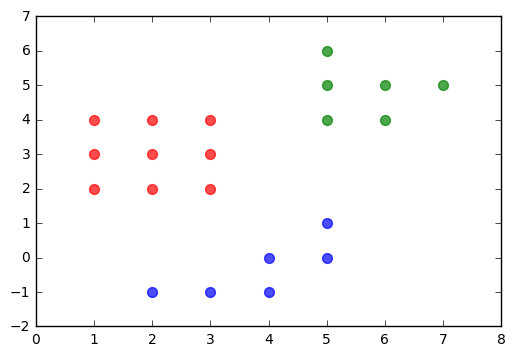

In [274]:
P1 = Point(np.array([1, 2]), 'red', 'red')
P2 = Point(np.array([1, 3]), 'red', 'red')
P3 = Point(np.array([1, 4]), 'red', 'red')
P4 = Point(np.array([2, 2]), 'red', 'red')
P5 = Point(np.array([2, 3]), 'red', 'red')
P6 = Point(np.array([2, 4]), 'red', 'red')
P7 = Point(np.array([3, 2]), 'red', 'red')
P8 = Point(np.array([3, 3]), 'red', 'red')
P9 = Point(np.array([3, 4]), 'red', 'red')
P10 = Point(np.array([6, 5]), 'green', 'green')
P11 = Point(np.array([5, 6]), 'green', 'green')
P12 = Point(np.array([5, 5]), 'green', 'green')
P19 = Point(np.array([6, 4]), 'green', 'green')
P20 = Point(np.array([5, 4]), 'green', 'green')
P21 = Point(np.array([7, 5]), 'green', 'green')
P13 = Point(np.array([2, -1]), 'blue', 'blue')
P14 = Point(np.array([4, 0]), 'blue', 'blue')
P15 = Point(np.array([5, 1]), 'blue', 'blue')
P16 = Point(np.array([4, -1]), 'blue', 'blue')
P17 = Point(np.array([3, -1]), 'blue', 'blue')
P18 = Point(np.array([5, 0]), 'blue', 'blue')
red_Points = Cluster(P1.X, 'red')
green_Points = Cluster(P10.X, 'green')
blue_Points = Cluster(P13.X, 'blue')
red_Points.a(P1)
red_Points.a(P2)
red_Points.a(P3)
red_Points.a(P4)
red_Points.a(P5)
red_Points.a(P6)
red_Points.a(P7)
red_Points.a(P8)
red_Points.a(P9)
green_Points.a(P10)
green_Points.a(P11)
green_Points.a(P12)
green_Points.a(P19)
green_Points.a(P20)
green_Points.a(P21)
blue_Points.a(P13)
blue_Points.a(P14)
blue_Points.a(P15)
blue_Points.a(P16)
blue_Points.a(P17)
blue_Points.a(P18)
red_Points.plot2D()
green_Points.plot2D()
blue_Points.plot2D()
plt.show()

In [275]:
mass_all=[P1, P2, P3, P4, P5, P6, P7, P8, P9, P10, P11, P12, P13, P14, P15, P16, P17, P18, P19, P20, P21]

In [276]:
def dPP(P1, P2):
    return np.sqrt((P1.X - P2.X).dot((P1.X - P2.X).T))

In [286]:
def dCm(Cluster, mass_of_Points):
    mass = []
    for i in range(len(mass_of_Points)):
        mass.append(dPP(Cluster.Center, mass_of_Points[i])/1)
    return mass

In [287]:
def find_min_in_column(matrix):
    mass = []
    for i in range(len(matrix[0])):
        element = matrix[0][i]
        index = 0
        for j in range(len(matrix)):
            if (element >= matrix[j][i]):
                element = matrix[j][i]
                index = j
        mass.append(index)
    return mass

In [288]:
def clusterisation(Clusters, mass_of_Points):
    matrix = []
    for i in range(len(Clusters)):
        matrix.append(dCm(Clusters[i], mass_of_Points))
    cl_nums = find_min_in_column(matrix)
    for i in range(len(cl_nums)):
        Clusters[cl_nums[i]].a(mass_of_Points[i])

In [293]:
import random
def KMeans(number_of_clusters, mass):
    center_names = random.sample(range(len(mass)), number_of_clusters)
    Clusters = []
    colors= ['purple', 'yellow', 'orange']
    for i in range(number_of_clusters):
        Clusters.append(Cluster(mass[center_names[i]].X, colors[i]))

    clusterisation(Clusters, mass_all)
    for i in range(len(Clusters)):
        Clusters[i].plot2D()
        Clusters[i].mean()
        Clusters[i].dispersion()
        Clusters[i].Center.plot2D()
    plt.show()
    for i in range(1000):
        clusterisation(Clusters, mass_all)
    for i in range(len(Clusters)):
        Clusters[i].plot2D()
        Clusters[i].mean()
        Clusters[i].dispersion()
        Clusters[i].Center.plot2D()
    plt.show()

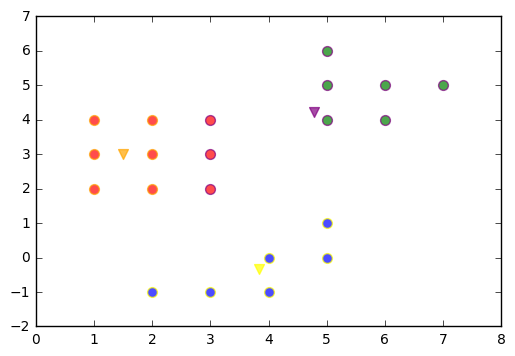

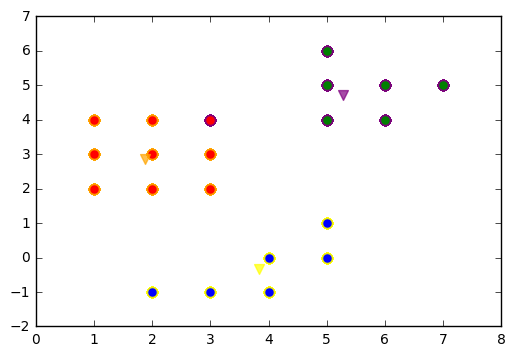

In [294]:
KMeans(3, mass_all)